In [1]:
import pandas as pd
from matplotlib import cm

from tiingo import TiingoClient
import quandl

import numpy as np
#import pandas as pd

from dateutil.relativedelta import relativedelta
import datetime

from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

import seaborn as sns

import networkx as nx

import matplotlib.pyplot as plt

import json
import requests
import networkx as nx

import graph_tool.all as gt 

from IPython.display import Image
#Image("img/picture.png")

In [2]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [3]:
df  = pd.read_csv("2020-1-2-2021-7-1-498.csv")
tiingo498  = pd.read_csv("tiingoSP498.csv")
tiingo498

ticker
0        A
1      AAL
2      AAP
3     AAPL
4     ABBV
..     ...
493    YUM
494    ZBH
495   ZBRA
496   ZION
497    ZTS

[498 rows x 1 columns]

In [4]:
tiingoList = list(tiingo498['ticker'])
#test = list(range(1, 5))


In [5]:
nxList = list(range(len(tiingoList)))
nxList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [6]:
config = {}
# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "a5e87637752491cca8c3a282688dbe81f7243561"

#quandl uUfmVoEksfwWxMA4tQcd
# Initialize
client = TiingoClient(config)

In [9]:
df = client.get_dataframe(tiingoList,
                                      frequency='daily',
                                      metric_name='adjClose',
                                      startDate='2021-01-02',
                                      endDate='2021-07-01')

In [10]:
df = np.log1p(df.pct_change()).iloc[1:]
df /= df.std(axis=0)
df

A       AAL       AAP      AAPL      ABBV  \
2021-01-05 00:00:00+00:00  0.611865  0.659847 -0.060538  0.711151  0.783726   
2021-01-06 00:00:00+00:00  2.032838  0.195454  3.145186 -1.981660 -0.660962   
2021-01-07 00:00:00+00:00  1.973333 -0.304533  0.476279  1.941889  0.811033   
2021-01-08 00:00:00+00:00  0.534147 -0.550768  0.792590  0.497377  0.398750   
2021-01-11 00:00:00+00:00  0.641868 -0.290007  0.315231 -1.361378  1.232811   
...                             ...       ...       ...       ...       ...   
2021-06-25 00:00:00+00:00  0.311868 -0.196048  0.958695 -0.130287 -1.177621   
2021-06-28 00:00:00+00:00  0.330900 -1.279399  0.021910  0.721567  0.013485   
2021-06-29 00:00:00+00:00  0.445679 -0.490624  0.215903  0.661762 -0.473395   
2021-06-30 00:00:00+00:00 -0.506659  0.206618 -0.043660  0.266826  0.230302   
2021-07-01 00:00:00+00:00 -0.010168  0.472018  1.027838  0.130845  1.087861   

                                ABC      ABMD       ABT       ACN      ADBE  \
2021-01-05 00:00:00+00:00  0.746949  0.835103  0.775987  0.480577  0.042423   
2021-01-06 00:00:00+00:00  4.751811 -0.139773 -0.131533  0.920585 -2.396330   
2021-01-07 00:00:00+00:00  2.108556  0.274901  0.609597  0.794969  1.425090   
2021-01-08 00:00:00+00:00 -0.052307  0.070221  0.175518  0.308218  0.899709   
2021-01-11 00:00:00+00:00 -1.419826  0.074316 -0.436866 -1.229907 -1.332434   
...                             ...       ...       ...       ...       ...   
2021-06-25 00:00:00+00:00  0.427216 -0.039396  0.573627  0.895362  0.142305   
2021-06-28 00:00:00+00:00 -0.797375  0.131186  1.646626 -0.218633  0.920685   
2021-06-29 00:00:00+00:00 -0.150745  0.120648  0.818244  0.725641  0.194576   
2021-06-30 00:00:00+00:00  0.025152 -0.168706 -0.692924 -0.469666 -0.511260   
2021-07-01 00:00:00+00:00  0.972439  0.116416  0.665999  1.483128 -0.091514   

                           ...       XEL      XLNX       XOM      XRAY  \
2021-01-05 00:00:00+00:00  ... -0.751659  0.461189  2.325976  1.528721   
2021-01-06 00:00:00+00:00  ...  1.694167 -0.774499  1.245188  2.552220   
2021-01-07 00:00:00+00:00  ... -1.527818  2.143931  0.386208 -0.280837   
2021-01-08 00:00:00+00:00  ...  0.708899 -0.424349  0.546543  0.485861   
2021-01-11 00:00:00+00:00  ... -1.616267  0.758873  1.477828  0.296838   
...                        ...       ...       ...       ...       ...   
2021-06-25 00:00:00+00:00  ...  0.974306 -0.439305  0.107114  0.346824   
2021-06-28 00:00:00+00:00  ... -0.046118  0.889699 -1.277419 -0.815595   
2021-06-29 00:00:00+00:00  ... -1.572841  1.124766 -0.306822  0.025674   
2021-06-30 00:00:00+00:00  ...  0.199831  1.310337  0.361692  0.008555   
2021-07-01 00:00:00+00:00  ...  1.338403 -0.725638  0.140814  0.654736   

                                XYL       YUM       ZBH      ZBRA      ZION  \
2021-01-05 00:00:00+00:00 -0.084909  0.008419  1.308966  0.351912  0.648644   
2021-01-06 00:00:00+00:00  2.912593  0.486951  2.144027  2.011207  4.394986   
2021-01-07 00:00:00+00:00  3.129220 -0.680791 -0.453706  1.943901  1.240405   
2021-01-08 00:00:00+00:00 -0.718482  1.298234 -0.167837 -0.487634 -1.062116   
2021-01-11 00:00:00+00:00 -0.898549  0.431333  0.023999  1.111296  0.962919   
...                             ...       ...       ...       ...       ...   
2021-06-25 00:00:00+00:00 -0.042218  0.197786  0.785047  0.027864  0.955788   
2021-06-28 00:00:00+00:00  1.403686 -0.870493 -0.995661  1.737807 -1.538523   
2021-06-29 00:00:00+00:00  0.023652 -0.423036 -1.183790  0.919102 -0.583249   
2021-06-30 00:00:00+00:00  0.424389 -0.409562 -0.170622 -0.674699  0.125120   
2021-07-01 00:00:00+00:00  0.105699  0.755831  1.092930  0.260802  0.742857   

                                ZTS  
2021-01-05 00:00:00+00:00  0.490766  
2021-01-06 00:00:00+00:00  1.030641  
2021-01-07 00:00:00+00:00 -0.063448  
2021-01-08 00:00:00+00:00  0.468169  
2021-01-11 00:00:00+00:00  0.536048  
...                             ...  
2021-06-25 00:00:00+00:00  0.701

In [12]:
#input nxG - networkx graph
#output GT - Graph-tool graph

def nxToGT(nxG):
    edgelist = list(nxG.edges)
    GT = gt.Graph(directed=False)
    GT.add_edge_list(edgelist)
    return GT

In [ ]:
def LassoCV(df,tiingoList):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(df)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [13]:


def Lasso(df,tiingoList):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(df)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [14]:
length = 60
window = 30

#tempDF = df[(-1-length * 2):-1]
tempDF = df[(-1-length * 2):-1]
len(tempDF[:length])

60

In [15]:
def splitDF(df, window):
    tempDFList = []
    #entropy = []
    tempDF = df[(-1-window * 2):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:length+i])
    return tempDFList

In [16]:
def splitDFTwo(df,length, window):
    tempDFList = []
    tempDF = df[(-1-length):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [19]:
templist30 = splitDFTwo(df, length, window)


In [21]:
#entropy = []
listGT = []
listState = []
for i in range(5):
    G = Lasso(templist30[i],nxList)
    tempGT = nxToGT(G)
    tempState = gt.minimize_nested_blockmodel_dl(tempGT)
    #tempEntropy = tempState.entropy()
    listState.append(tempState)
    listGT.append(tempGT)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply


0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

4


In [45]:
entropy = []
listGT = []
listState = []
for i in range(length):
    G = Lasso(templist[i],nxList)
    tempGT = nxToGT(G)
    tempState = gt.minimize_nested_blockmodel_dl(tempGT)
    tempEntropy = tempState.entropy()
    listState.append(tempState)
    entropy.append(tempEntropy)
    listGT.append(tempGT)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.254e-04
  warnings.warn('graphical_lasso: did not converge after '


4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.107e-04
  warnings.warn('graphical_lasso: did not converge after '


6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


9


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


10


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.809e-04
  warnings.warn('graphical_lasso: did not converge after '


11


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

12


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


13


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


14


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

15


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


16


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

17


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


18


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


19


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


20


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


21


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


23


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.710e-04
  warnings.warn('graphical_lasso: did not converge after '


24


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


25


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.597e-04
  warnings.warn('graphical_lasso: did not converge after '


26


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


27


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.253e-04
  warnings.warn('graphical_lasso: did not converge after '


28


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

29


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


30


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

31


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.749e-04
  warnings.warn('graphical_lasso: did not converge after '


32


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.612e-04
  warnings.warn('graphical_lasso: did not converge after '


33


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.739e-04
  warnings.warn('graphical_lasso: did not converge after '


34


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.215e-04
  warnings.warn('graphical_lasso: did not converge after '


35


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.559e-04
  warnings.warn('graphical_lasso: did not converge after '


36


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


37


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

38


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

39


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

40


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


41


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

42


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


43


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


44


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


45


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

46


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

47


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


48


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


49


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


50


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.469e-04
  warnings.warn('graphical_lasso: did not converge after '


51


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

52


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


53


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


54


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


55


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


56


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


57


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


58


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


59


In [46]:
entropy

[12948.349800707263,
 13049.991098039838,
 12988.150099039236,
 12824.31878401957,
 12488.789959647787,
 12591.072281854267,
 12139.26922706611,
 12320.86165064325,
 12204.665444979291,
 12117.316511564224,
 12091.45284466969,
 11670.27561735492,
 11680.000445612253,
 8313.001576596147,
 7207.466647368207,
 5706.187122928401,
 5272.18687578188,
 5104.732517356272,
 5312.531131374011,
 4841.370706928939,
 5201.5369004132035,
 5157.359693774429,
 5327.651244003075,
 5457.8833066037005,
 5599.873168521044,
 6396.120300343611,
 7862.400488395083,
 8702.22105369326,
 8901.979075703055,
 8720.841495000985,
 9857.247802320731,
 10052.188668792272,
 9230.713999034477,
 7521.199639071574,
 7088.981408018571,
 7170.028783041984,
 6807.1505165176295,
 6275.891611995395,
 12293.91840512516,
 11103.331280305378,
 11862.663704948944,
 11575.082313105278,
 11625.612224277853,
 11595.954720913409,
 11808.223014940224,
 11717.272072992724,
 11599.04989400782,
 11355.408548508394,
 11269.098214366895,
 

In [47]:
entDF = pd.DataFrame(entropy)

<AxesSubplot:>

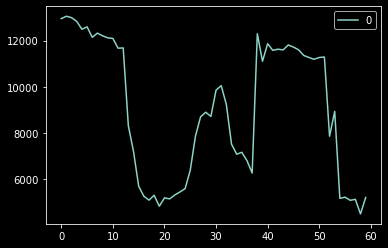

In [52]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
entDF.plot()

In [22]:
for i in range(5):
    temp = listState[i]
    gt.draw_hierarchy(temp, output="state"+str(i)+".png", vcmap=cm.magma)

In [ ]:

    #name = 'C:/Users/marialavrovskaa/Desktop/Images/file_' + str(image_no) + '.jpg'

In [10]:
#G = Lasso(df,tiingoList)
G = Lasso(df,nxList)

G.number_of_edges()

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.596e-04
  warnings.warn('graphical_lasso: did not converge after '


3176

In [11]:
#G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.1*1/np.sqrt(len(G.nodes())), iterations=20)

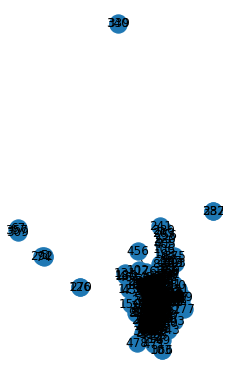

In [12]:

plt.figure(3, figsize=(3, 5))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [14]:
G.number_of_edges()

3176

In [16]:
nxt = nxToGT(G)

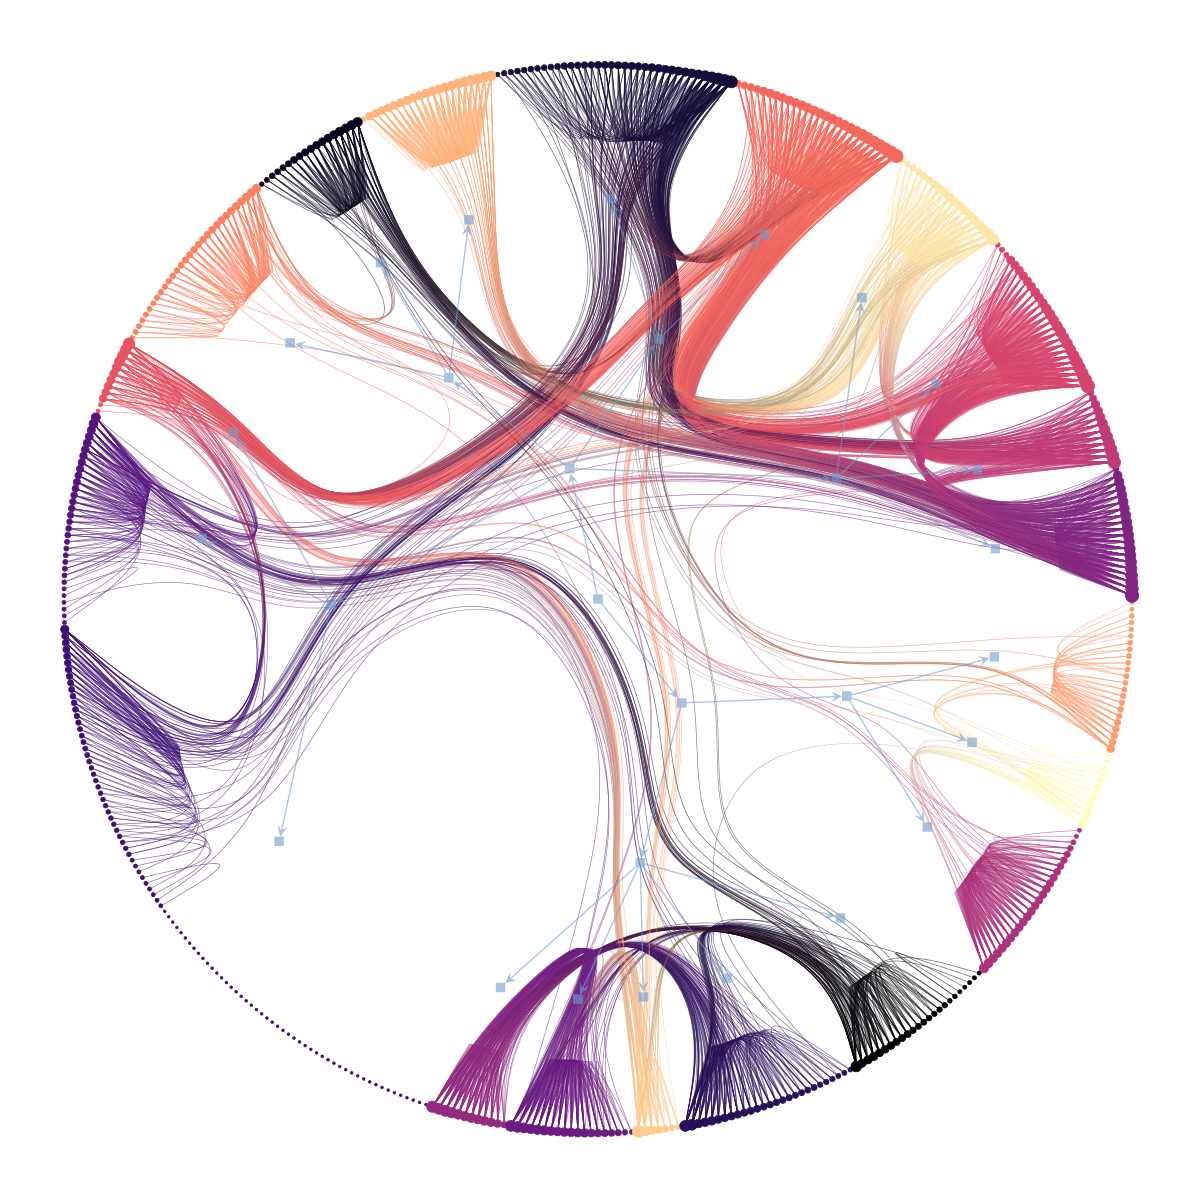

In [17]:
state = gt.minimize_nested_blockmodel_dl(nxt)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")

In [18]:
state.entropy()

10047.50531708276

In [28]:
#input precision matrix
#output networkX G

def makeLinks(p):
    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 
    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [49]:
##Temporal Graphical Lasso

def graphLasso(df, inputlist):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(first_n_column)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=inputlist , index=inputlist )
    return p

In [50]:
lassovar = graphLasso(df, nxList)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [51]:
type(lassovar)

pandas.core.frame.DataFrame

In [52]:
G = makeLinks(lassovar)

In [53]:
nxG = nxToGT(G)
nxG.edges

<bound method Graph.edges of <Graph object, undirected, with 496 vertices and 26 edges, at 0x7ff3b709c910>>

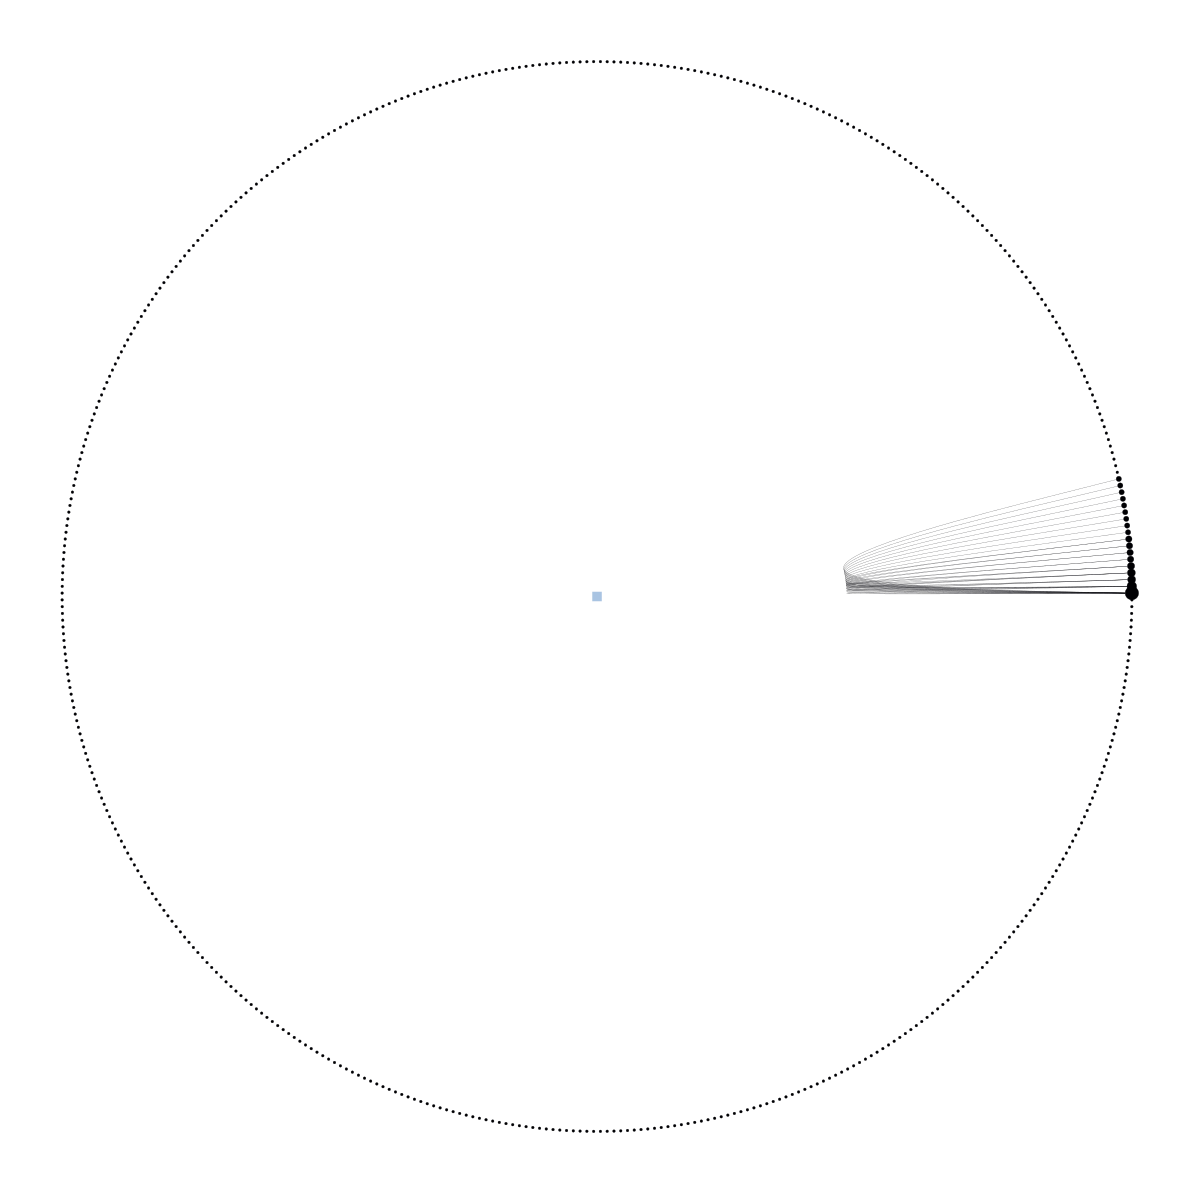

In [54]:
state = gt.minimize_nested_blockmodel_dl(nxG)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")